# Clustering Input prediction Data

In [57]:
import pandas as pd
import prediction_of_H_indicator_with_subCatchmentData as prediction
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Import data

In [46]:
input_data = prediction.import_input_data()
input_data

,Site,SubCatch,Slope,Elevation,LC,SAR,Area,CV,HV,HError,Rate
0,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.000000,1.0
1,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.003310,2.0
2,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.003310,7.0
3,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.003310,15.0
4,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.035656,21.0
...,...,...,...,...,...,...,...,...,...,...,...
6805,40,15,8.875044,224.490265,933.385135,1.006683,4387500,0,12,NaN,NaN
6806,40,16,6.585227,178.075058,700.135624,1.003876,2930625,0,20,NaN,NaN
6807,40,17,5.182087,173.802765,685.592278,1.002990,3661875,0,34,NaN,NaN
6808,40,18,4.617903,196.079285,597.577939,1.002033,5023125,0,68,NaN,NaN


## Clean data

In [47]:
# Remove redundant data!!!
crits_all = input_data.iloc[:,:9]
crits_all.drop_duplicates(inplace=True)
crits = crits_all.iloc[:,2:]
crits

,Slope,Elevation,LC,SAR,Area,CV,HV
0,1.203898,8.936689,319.676414,1.000254,1648125,167,211
30,2.601987,35.812946,653.589956,1.000564,3954375,0,223
31,3.146334,46.627327,666.589392,1.000757,6120000,0,126
61,0.827364,7.674784,693.148995,1.000167,2480625,393,163
91,1.790146,18.949850,930.108903,1.000325,4173750,164,253
...,...,...,...,...,...,...,...
6805,8.875044,224.490265,933.385135,1.006683,4387500,0,12
6806,6.585227,178.075058,700.135624,1.003876,2930625,0,20
6807,5.182087,173.802765,685.592278,1.002990,3661875,0,34
6808,4.617903,196.079285,597.577939,1.002033,5023125,0,68


## Info about values of criteria

In [48]:
crits.describe(percentiles=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999])

,Slope,Elevation,LC,SAR,Area,CV,HV
count,444.000000,444.000000,444.000000,444.000000,4.440000e+02,444.000000,444.000000
mean,3.790333,58.083201,633.389541,1.002043,3.918598e+06,70.373874,130.851351
std,2.103919,45.301026,167.372741,0.002531,2.923626e+06,192.710276,155.595559
min,0.205963,-1.291177,37.500000,1.000017,1.125000e+04,0.000000,0.000000
1%,0.416443,2.346409,142.053138,1.000049,1.680188e+05,0.000000,3.430000
10%,1.529903,12.351543,455.402576,1.000331,1.529438e+06,0.000000,16.000000
20%,2.139401,24.383272,522.567998,1.000494,2.084625e+06,0.000000,29.000000
30%,2.466055,30.822459,562.939682,1.000713,2.495812e+06,0.000000,43.000000
40%,2.929555,39.076736,593.408244,1.000962,3.031875e+06,0.000000,64.000000
50%,3.428588,46.599808,633.551378,1.001268,3.518438e+06,0.000000,85.500000


In [69]:
def get_k_means_for_a_nb_of_cluster(nb_cluster, crits):
    kmeans = KMeans(n_clusters = nb_cluster, init= 'k-means++')  #, n_init = 100, random_state = 99, algorithm="full"
    clusters = kmeans.fit_predict(crits)
    #print(clusters)
    taille = 444
    count_in_cluster = {}
    for cluster in range(nb_cluster):
        count_in_cluster[cluster] = list(clusters).count(cluster)
        print("Number of sub-catchment areas in cluster n°", str(cluster), ":", count_in_cluster[cluster], "=> ", (count_in_cluster[cluster]/taille)*100, "%")
    return clusters, count_in_cluster, kmeans

In [76]:
clusters, count_in_cluster, kmeans = get_k_means_for_a_nb_of_cluster(4, crits)

Number of sub-catchment areas in cluster n° 0 : 194 =>  43.69369369369369 %
Number of sub-catchment areas in cluster n° 1 : 1 =>  0.22522522522522523 %
Number of sub-catchment areas in cluster n° 2 : 48 =>  10.81081081081081 %
Number of sub-catchment areas in cluster n° 3 : 201 =>  45.27027027027027 %


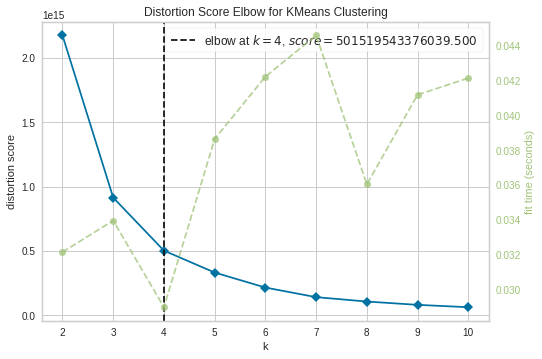

In [75]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2,11))
visualizer.fit(crits)
visualizer.show(outpath="elbowvis.png")

## Euclidian distance between centers of clusters

In [72]:
def get_centers_of_clusters(kmeans):
    return kmeans.cluster_centers_

In [73]:
def get_euclidian_distance_between_cluster_centers(cluster_centers):
    eucl_distance_between_centers = {}
    for num_cluster in range(len(cluster_centers)-1):
        eucl_distance_between_centers[num_cluster]={}
        for other_cluster in range(num_cluster+1, len(cluster_centers)):
            eucl_distance_between_centers[num_cluster][other_cluster] = np.linalg.norm(cluster_centers[num_cluster]-cluster_centers[other_cluster])
    print(eucl_distance_between_centers)
    return eucl_distance_between_centers

In [74]:
cluster_centers = get_centers_of_clusters(kmeans)
eucl_distance_between_centers = get_euclidian_distance_between_cluster_centers(cluster_centers)

{0: {1: 41175017.15614657, 2: 3871261.517408714}, 1: {2: 37303755.64254325}}


## Get Info on the Subcatchment area on its own cluster

In [41]:
import numpy as np
result = np.where(clusters == 1)
result[0]

array([130])

In [ ]:
for index in result[0]:
    print(crits.iloc[index])

## Save cluster on file

In [15]:
crits_all["clusters"] = clusters

In [16]:
crits_all

,Site,SubCatch,Slope,Elevation,LC,SAR,Area,CV,HV,clusters
0,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0
30,1,2,2.601987,35.812946,653.589956,1.000564,3954375,0,223,0
31,1,3,3.146334,46.627327,666.589392,1.000757,6120000,0,126,1
61,1,4,0.827364,7.674784,693.148995,1.000167,2480625,393,163,0
91,1,5,1.790146,18.949850,930.108903,1.000325,4173750,164,253,0
...,...,...,...,...,...,...,...,...,...,...
6805,40,15,8.875044,224.490265,933.385135,1.006683,4387500,0,12,0
6806,40,16,6.585227,178.075058,700.135624,1.003876,2930625,0,20,0
6807,40,17,5.182087,173.802765,685.592278,1.002990,3661875,0,34,0
6808,40,18,4.617903,196.079285,597.577939,1.002033,5023125,0,68,1


In [10]:
crits_all.to_csv("output/" + "Clusters_Sites_SubCatch" + ".csv", index=False)

## Merging with Category file

In [18]:
category = pd.read_csv("data/" + "Prediction_PMax_SubCatch_Chronicle0_Approx0_K27.32_AllSites_Slope_Elevation_LC_SAR_Area_CV_HV_Category_meeting.csv")

In [21]:
category = category.rename(columns = {'Test Site':'Site'})
category = category.rename(columns = {'SubCatchment':'SubCatch'})

In [22]:
category

,Approx,Chronicle,Site,SubCatch,MSE Test,R2 Test,P Real,P pred,Category
0,0,0,1,1,0.005839,2.463035e-01,90,182,D
1,0,0,1,3,0.030917,1.424021e-01,100,182,D
2,0,0,1,4,0.005627,7.094419e-02,90,182,D
3,0,0,1,5,0.768422,-4.190144e+01,100,50,P
4,0,0,1,6,0.035940,7.552271e-02,100,365,D
...,...,...,...,...,...,...,...,...,...
219,0,0,39,4,0.000142,-5.024079e+02,3652,3652,G
220,0,0,39,5,0.004239,-1.839583e+04,3652,1000,P
221,0,0,39,7,0.000337,-1.833014e+06,3652,3652,G
222,0,0,39,8,0.060174,-2.878078e+05,3652,75,P


In [25]:
merged = category.merge(crits_all)
merged

,Approx,Chronicle,Site,SubCatch,MSE Test,R2 Test,P Real,P pred,Category,Slope,Elevation,LC,SAR,Area,CV,HV,clusters
0,0,0,1,1,0.005839,2.463035e-01,90,182,D,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0
1,0,0,1,3,0.030917,1.424021e-01,100,182,D,3.146334,46.627327,666.589392,1.000757,6120000,0,126,1
2,0,0,1,4,0.005627,7.094419e-02,90,182,D,0.827364,7.674784,693.148995,1.000167,2480625,393,163,0
3,0,0,1,5,0.768422,-4.190144e+01,100,50,P,1.790146,18.949850,930.108903,1.000325,4173750,164,253,0
4,0,0,1,6,0.035940,7.552271e-02,100,365,D,2.782739,59.854298,651.572422,1.000696,3729375,0,67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,39,4,0.000142,-5.024079e+02,3652,3652,G,8.758309,162.546722,690.708947,1.006050,2925000,0,27,0
220,0,0,39,5,0.004239,-1.839583e+04,3652,1000,P,7.371158,150.872406,470.062314,1.004910,8943750,0,127,1
221,0,0,39,7,0.000337,-1.833014e+06,3652,3652,G,4.720726,195.869247,672.920859,1.001445,1299375,0,5,0
222,0,0,39,8,0.060174,-2.878078e+05,3652,75,P,6.162337,121.253716,589.868107,1.003319,9225000,0,61,1


In [29]:
merged_cut = merged[['Site', 'SubCatch', 'Category', 'clusters']]
merged_cut

,Site,SubCatch,Category,clusters
0,1,1,D,0
1,1,3,D,1
2,1,4,D,0
3,1,5,P,0
4,1,6,D,0
...,...,...,...,...
219,39,4,G,0
220,39,5,P,1
221,39,7,G,0
222,39,8,P,1


In [30]:
merged.to_csv("output/" + "clusters_categories.csv", index=False)
merged_cut.to_csv("output/" + "clusters_categories_cut.csv", index=False)